X -> (-1,1)
X -> FGM -> Xadv
Xadv -> (0,255)
process -> predict

In [1]:
from module.cleverhans_model import AttackModel
from module.utils import * 
from cleverhans.attacks import FastGradientMethod
%matplotlib inline
import logging
logging.getLogger('tensorflow').setLevel(logging.WARNING)

Using TensorFlow backend.


resnetv1_50 attack runs: 76.53 s
L2 25.348244644562612
resnetv1_50 predict runs: 20.11 s
adv acc:  0.34545454
L2 25.348244604068874


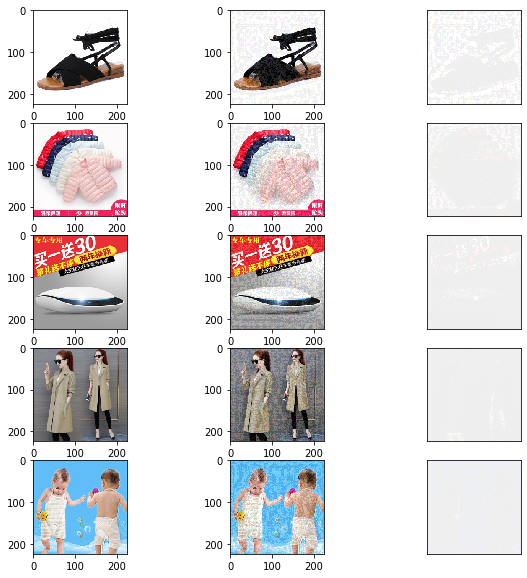

In [2]:
from module.official_model_v2 import Inception_preprocess

name = 'resnetv1_50'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
X = Inception_preprocess(X)

(_min, _max) = (-1.0, 1.0)
attack_params = {"eps":32.0 / 255.0, "clip_min": _min, "clip_max": _max}
p=Profile(M.name+' attack')
Xadv, ypred, accuracy = M.attack(X,Y, FastGradientMethod,attack_params)
p.stop()
#print("adv acc: ", accuracy)
#print("L2 mean: ", M.L2(X,Xadv))
X = Inception_preprocess(X, undo=True)
Xadv = Inception_preprocess(Xadv, undo=True)
print('L2', calc_l2(X, Xadv))

Xadv = M.preprocess_input(Xadv)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(Xadv,Y)
p.stop()
Xadv = M.undo_preprocess(Xadv)

print("adv acc: ",accuracy)
print('L2', calc_l2(X, Xadv))
plot_images(X, Xadv)

In [3]:
#Transfer to Inception
name = 'inception_v1'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

Xadv = M.preprocess_input(Xadv)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(Xadv,Y)
p.stop()
print('ACC', accuracy)

Xadv = M.undo_preprocess(Xadv)

inception_v1 predict runs: 11.79 s
ACC 0.59090906


In [4]:
#Transfer to vgg
name = 'vgg_16'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

Xadv = M.preprocess_input(Xadv)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(Xadv,Y)
p.stop()
print('ACC', accuracy)

Xadv = M.undo_preprocess(Xadv)

vgg_16 predict runs: 217.40 s
ACC 0.6181818


# Attack Vgg

vgg_16 attack runs: 451.07 s
L2 25.3727844468233
vgg_16 predict runs: 168.95 s
adv acc:  0.38181818
L2 25.3727844027069


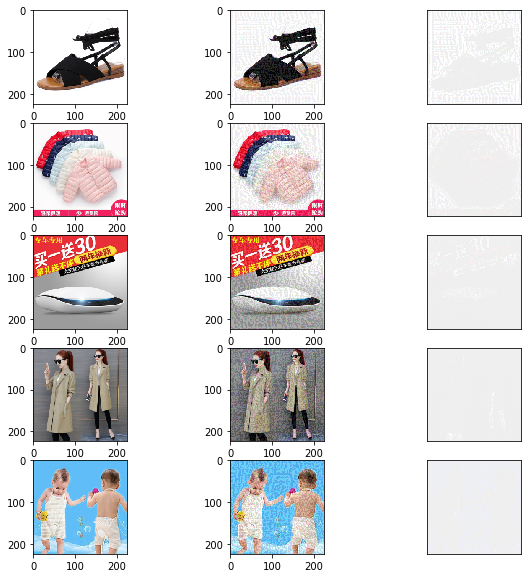

In [5]:
from module.official_model_v2 import Inception_preprocess

name = 'vgg_16'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
X = Inception_preprocess(X)

(_min, _max) = (-1.0, 1.0)
attack_params = {"eps":32.0 / 255.0, "clip_min": _min, "clip_max": _max}
p=Profile(M.name+' attack')
Xadv, ypred, accuracy = M.attack(X,Y, FastGradientMethod,attack_params)
p.stop()
#print("adv acc: ", accuracy)
#print("L2 mean: ", M.L2(X,Xadv))
X = Inception_preprocess(X, undo=True)
Xadv = Inception_preprocess(Xadv, undo=True)
print('L2', calc_l2(X, Xadv))

Xadv = M.preprocess_input(Xadv)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(Xadv,Y)
p.stop()
Xadv = M.undo_preprocess(Xadv)

print("adv acc: ",accuracy)
print('L2', calc_l2(X, Xadv))
plot_images(X, Xadv)